In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pycocotools.coco import COCO
import skimage.io as io

In [2]:
im = Image.open('../data/livecell/A172_Phase_C7_1_00d00h00m_1.tif')
im.show()

In [3]:
imarray = np.array(im)

In [4]:
imarray.shape

(520, 704)


(eog:5995): EOG-WARNING **: 14:49:24.307: Thumbnail creation failed

(eog:5995): EOG-WARNING **: 14:49:24.663: Thumbnail creation failed


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  3.  ,   5.52,   8.04,  10.56,  13.08,  15.6 ,  18.12,  20.64,
         23.16,  25.68,  28.2 ,  30.72,  33.24,  35.76,  38.28,  40.8 ,
         43.32,  45.84,  48.36,  50.88,  53.4 ,  55.92,  58.44,  60.96,
         63.48,  66.  ,  68.52,  71.04,  73.56,  76.08,  78.6 ,  81.12,
         83.64,  86.16,  88.68,  91.2 ,  93.72,  96.24,  98.76, 101.28,
        103.8 , 106.32, 108.84, 111.36, 113.88, 116.4 , 118.92, 121.44,
        123.96, 126.48, 129.  , 131.52, 134.04, 136.56, 139.08, 141.6 ,
        144.12, 146.64, 149.16, 151.68, 154.2 , 156.72, 159.24, 161.76,
        164.28, 166.8 , 169.32, 171.84, 174.36, 176.88, 179.4 , 181.92,
        184.44, 186.96, 189.48, 192.  , 194.52, 197.04, 199.56, 202.08,
        204.6 , 207.12, 209.64,

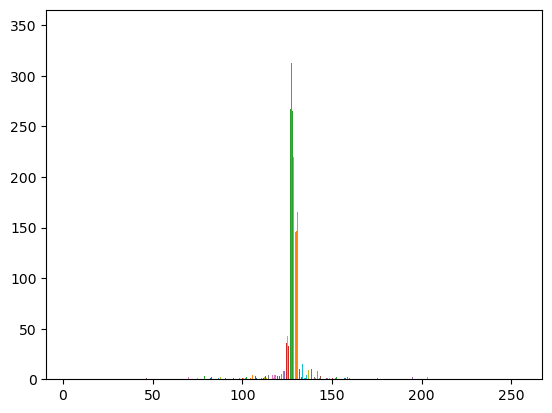

In [5]:
plt.hist(imarray, bins=100)

In [3]:
coco=COCO('../data/livecell/livecell_coco_test.json')

loading annotations into memory...
Done (t=6.31s)
creating index...
index created!


In [9]:
coco.loadImgs(coco.getImgIds())

[{'id': 101438,
  'width': 704,
  'height': 520,
  'file_name': 'BT474_Phase_D3_1_04d04h00m_3.tif',
  'original_filename': 'BT474_Phase_D3_1_04d04h00m_3.png',
  'url': 'https://darwin.v7labs.com/api/images/870104/original'},
 {'id': 101798,
  'width': 704,
  'height': 520,
  'file_name': 'BT474_Phase_D3_2_03d04h00m_2.tif',
  'original_filename': 'BT474_Phase_D3_2_03d04h00m_2.png',
  'url': 'https://darwin.v7labs.com/api/images/61733/original'},
 {'id': 101943,
  'width': 704,
  'height': 520,
  'file_name': 'BT474_Phase_D3_1_01d12h00m_4.tif',
  'original_filename': 'BT474_Phase_D3_1_01d12h00m_4.png',
  'url': 'https://darwin.v7labs.com/api/images/921720/original'},
 {'id': 102143,
  'width': 704,
  'height': 520,
  'file_name': 'BT474_Phase_D3_2_04d16h00m_1.tif',
  'original_filename': 'BT474_Phase_D3_2_04d16h00m_1.png',
  'url': 'https://darwin.v7labs.com/api/images/37521/original'},
 {'id': 102490,
  'width': 704,
  'height': 520,
  'file_name': 'BT474_Phase_D3_2_00d12h00m_3.tif',
  

In [4]:
dir(coco)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'annToMask',
 'annToRLE',
 'anns',
 'catToImgs',
 'cats',
 'createIndex',
 'dataset',
 'download',
 'getAnnIds',
 'getCatIds',
 'getImgIds',
 'imgToAnns',
 'imgs',
 'info',
 'loadAnns',
 'loadCats',
 'loadImgs',
 'loadNumpyAnnotations',
 'loadRes',
 'showAnns']

In [11]:
imgIds = coco.getImgIds(imgIds = [253059])
catIds = coco.getCatIds(catNms=['cell'])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [23]:
len(coco.loadAnns(coco.getAnnIds(imgIds=img['id'])))

146

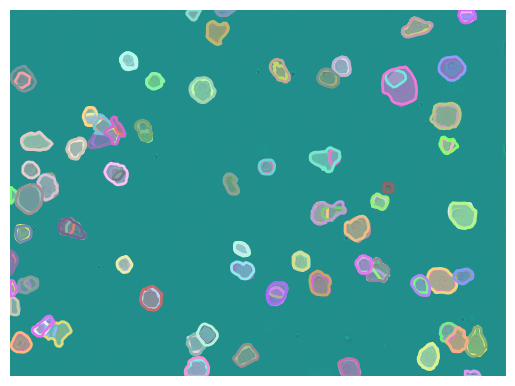

In [12]:
plt.imshow(im); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

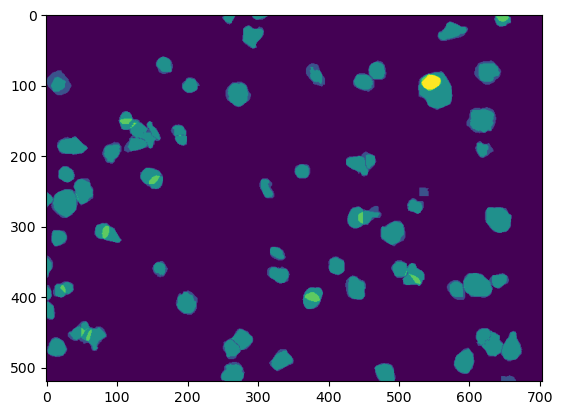

In [18]:
mask = np.sum(np.array([coco.annToMask(ann) for ann in anns]), axis=0)
plt.imshow(mask)

In [16]:
np.unique(mask)

array([0, 1, 2, 3, 4], dtype=uint8)